In [48]:
import glob
import os
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
from tqdm import tqdm as tqdm
from netCDF4 import Dataset

In [58]:
dirname = '/glusteruser/aibrahi2/MOBY_vcal/L2_v2/'

In [59]:
filenames = []
order = []
for i, filename in enumerate(glob.glob(dirname + '*.nc')):
    if os.path.getsize(filename)*1e-9 > 0.00:
        filenames.append(filename)
    order.append(np.int(str.split(str.split(filename,'/')[-1], '_')[0]))
ix = np.argsort(np.array(order))
min_ = np.sort(np.array(order)).min()
max_ = np.sort(np.array(order)).max()
sort_order = np.arange(min_,max_+1)
sorted_fnames = []
c=0
for i, num in enumerate(sort_order):
    if num in np.sort(np.array(order)):
        sorted_fnames.append(filenames[ix[c]])
        c += 1
    else:
        sorted_fnames.append('NA')

In [60]:
nc_fid = Dataset(sorted_fnames[0], 'r')
bands = nc_fid['sensor_band_parameters']['wavelength'][:].data
nc_fid.close()

In [35]:
λ = bands[0:10]

In [36]:
Rrs_names = []
Lt_names = []
Lr_names = []
rhot_names = []
TLg_names = []
polcor_names = []
Es_names = []
brdf_names = []
tLf_names = []
t_sol_names = []
t_sen_names = []
La_names = []

mw = np.array([412,443,488,531,547,555,667,678])

for w in λ:
    b = bands[np.where(bands<=w)[0][-1]]
    Rrs_names.append('Rrs_%d' % b)
    Lt_names.append('Lt_%d' % b)
    Lr_names.append('Lr_%d' % b)
    La_names.append('La_%d' % b)
    rhot_names.append('rhot_%d' % b)
    TLg_names.append('TLg_%d' % b)
    polcor_names.append('polcor_%d' % b)
    Es_names.append('Es_%d' % b)
    tLf_names.append('tLf_%d' % b)
    t_sol_names.append('t_sol_%d' % b)
    t_sen_names.append('t_sen_%d' % b)
    brdf_names.append('brdf_%d' % b)

In [37]:
# chlor_a, Lt, La, Lr, rhot, TLg, pcolor, Es, brdf, tLf, t_sol, t_sen_
Rrs = np.empty((len(λ), 11*11, len(sorted_fnames))) + np.nan
f = np.empty((11*11, len(sorted_fnames))) + np.nan
chlor_a = np.empty((11*11, len(sorted_fnames))) + np.nan
Lt = np.empty((len(λ), 11*11, len(sorted_fnames))) + np.nan
Lr = np.empty((len(λ), 11*11, len(sorted_fnames))) + np.nan
La = np.empty((len(λ), 11*11, len(sorted_fnames))) + np.nan
rhot = np.empty((len(λ), 11*11, len(sorted_fnames))) + np.nan
TLg = np.empty((len(λ), 11*11, len(sorted_fnames))) + np.nan
polcor = np.empty((len(λ), 11*11, len(sorted_fnames))) + np.nan
Es = np.empty((len(λ), 11*11, len(sorted_fnames))) + np.nan
brdf = np.empty((len(λ), 11*11, len(sorted_fnames))) + np.nan
tLf = np.empty((len(λ), 11*11, len(sorted_fnames))) + np.nan
t_sol = np.empty((len(λ), 11*11, len(sorted_fnames))) + np.nan
t_sen = np.empty((len(λ), 11*11, len(sorted_fnames))) + np.nan
relaz = np.empty((11*11, len(sorted_fnames))) + np.nan
scattang = np.empty((11*11, len(sorted_fnames))) + np.nan
glint_coef = np.empty((11*11, len(sorted_fnames))) + np.nan

Rrs_mask = np.empty((11*11, len(sorted_fnames))) + np.nan
for i, filename in enumerate(tqdm(sorted_fnames)):
    try:
        nc_fid = Dataset(filename, 'r')
        f_temp = nc_fid['geophysical_data']['l2_flags'][:].data.ravel()
        chl_temp = nc_fid['geophysical_data']['chlor_a'][:].data.ravel()
        relaz_temp = nc_fid['geophysical_data']['relaz'][:].data.ravel()
        scattang_temp = nc_fid['geophysical_data']['scattang'][:].data.ravel()
        glint_temp = nc_fid['geophysical_data']['glint_coef'][:].data.ravel()

        if len(f_temp) <=121:
            f[:,i] = np.pad(f_temp, (0,np.abs(121 - len(f_temp))))
            chlor_a[:,i] = np.pad(chl_temp, (0,np.abs(121 - len(f_temp))))
            relaz[:,i] = np.pad(relaz_temp, (0,np.abs(121 - len(f_temp))))
            scattang[:,i] = np.pad(scattang_temp, (0,np.abs(121 - len(f_temp))))
            glint_coef[:,i] = np.pad(glint_temp, (0,np.abs(121 - len(f_temp))))
            for l in range(len(λ)):
                Rrs_temp = nc_fid['geophysical_data'][Rrs_names[l]][:].data.ravel()
                Lt_temp = nc_fid['geophysical_data'][Lt_names[l]][:].data.ravel()
                Lr_temp = nc_fid['geophysical_data'][Lr_names[l]][:].data.ravel()
                La_temp = nc_fid['geophysical_data'][La_names[l]][:].data.ravel()
                rhot_temp = nc_fid['geophysical_data'][rhot_names[l]][:].data.ravel()
                TLg_temp = nc_fid['geophysical_data'][TLg_names[l]][:].data.ravel()
                polcor_temp = nc_fid['geophysical_data'][polcor_names[l]][:].data.ravel()
                Es_temp = nc_fid['geophysical_data'][Es_names[l]][:].data.ravel()
                tLf_temp = nc_fid['geophysical_data'][tLf_names[l]][:].data.ravel()
                t_sol_temp = nc_fid['geophysical_data'][t_sol_names[l]][:].data.ravel()
                t_sen_temp = nc_fid['geophysical_data'][t_sen_names[l]][:].data.ravel()
                brdf_temp = nc_fid['geophysical_data'][brdf_names[l]][:].data.ravel()

                Rrs[l,:,i] =  np.pad(Rrs_temp, (0,np.abs(121 - len(Rrs_temp))))
                Lt[l,:,i] =  np.pad(Lt_temp, (0,np.abs(121 - len(Rrs_temp))))
                Lr[l,:,i] =  np.pad(Lr_temp, (0,np.abs(121 - len(Rrs_temp))))
                La[l,:,i] =  np.pad(La_temp, (0,np.abs(121 - len(Rrs_temp))))
                rhot[l,:,i] =  np.pad(rhot_temp, (0,np.abs(121 - len(Rrs_temp))))
                TLg[l,:,i] =  np.pad(TLg_temp, (0,np.abs(121 - len(Rrs_temp))))
                polcor[l,:,i] =  np.pad(polcor_temp, (0,np.abs(121 - len(Rrs_temp))))
                Es[l,:,i] =  np.pad(Es_temp, (0,np.abs(121 - len(Rrs_temp))))
                tLf[l,:,i] =  np.pad(tLf_temp, (0,np.abs(121 - len(Rrs_temp))))
                t_sol[l,:,i] =  np.pad(t_sol_temp, (0,np.abs(121 - len(Rrs_temp))))
                t_sen[l,:,i] =  np.pad(t_sen_temp, (0,np.abs(121 - len(Rrs_temp))))
                brdf[l,:,i] =  np.pad(brdf_temp, (0,np.abs(121 - len(Rrs_temp))))
                
    #             Rrs_mask[l,:,i] = (Rrs[l,:,i] > 0) & (Rrs[l,:,i] < 1)
    except OSError and IndexError and  FileNotFoundError:
        print('Can not read this file ' + filename)

Rrs[(Rrs<0) | (Rrs > 1)] = np.nan

 34%|███▍      | 180/523 [00:31<00:54,  6.33it/s]

Can not read this file NA


 36%|███▌      | 187/523 [00:32<00:43,  7.71it/s]

Can not read this file NA
Can not read this file NA
Can not read this file NA


 37%|███▋      | 193/523 [00:32<00:32, 10.16it/s]

Can not read this file NA
Can not read this file NA


 38%|███▊      | 199/523 [00:33<00:31, 10.44it/s]

Can not read this file NA
Can not read this file NA
Can not read this file NA


 39%|███▉      | 206/523 [00:34<00:38,  8.13it/s]

Can not read this file NA


 41%|████▏     | 217/523 [00:35<00:43,  7.05it/s]

Can not read this file NA
Can not read this file NA


 42%|████▏     | 221/523 [00:36<00:33,  8.92it/s]

Can not read this file NA


 88%|████████▊ | 461/523 [01:22<00:10,  6.01it/s]

Can not read this file NA


100%|██████████| 523/523 [01:33<00:00,  5.57it/s]
/accounts/aibrahi2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in less
/accounts/aibrahi2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in greater


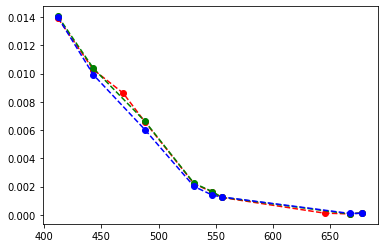

In [436]:
ii = 234
plt.plot(λ[0:10], np.nanmedian(Rrs[0:10,:,ii], axis=1), '--or');
plt.plot(mw, Rrs_aqua[ii,:],  '--og')
plt.plot(mw, Rrs_mob[ii,:],  '--ob')

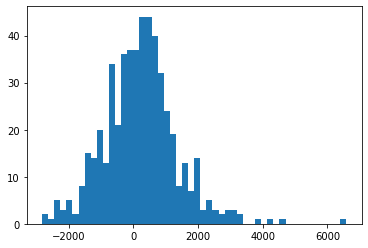

In [377]:
iw = 0
pd = 100*(Rrs_aqua- Rrs_mob)/Rrs_mob
plt.hist(100*pd[:,iw], 50);

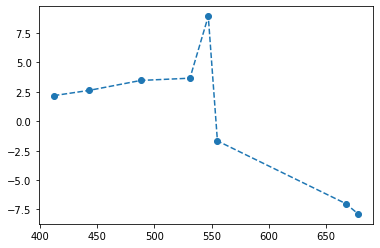

In [378]:
plt.plot(mw, np.nanmedian(pd, axis=0), '--o')
# plt.plot(mw, np.nanstd(pd, axis=0), '--o')

In [299]:
np.save('Rrs_aqua', Rrs_aqua)

In [260]:
Rrs_aqua = np.reshape(Rrs_aqua, (523,8))

In [304]:
np.save('Rrs_mob', Rrs_mob)

In [252]:
mw = np.array([412,443,488,531,547,555,667,678])

In [301]:
Rrs_mob = np.reshape(Rrs_mob, (523,8))

In [371]:
# chlor_a, Lt, La, Lr, rhot, TLg, pcolor, Es, brdf, tLf, t_sol, t_sen_
chlor_a.shape

(121, 523)

In [453]:
np.save('Lt', Lt)
np.save('chlor_a', chlor_a)
np.save('La', La)
np.save('Lr', Lr)
np.save('rhot', rhot)
np.save('TLg', TLg)
np.save('polcor', polcor)
np.save('Es', Es)
np.save('brdf', brdf)
np.save('tLf', tLf)
np.save('t_sol', t_sol)
np.save('t_sen', t_sen)
np.save('relaz', relaz)
np.save('glint_coef', glint_coef)
np.save('scattang',scattang)

/accounts/aibrahi2/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1116: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


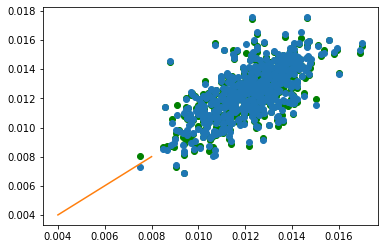

In [452]:
ii=0
plt.plot(Rrs_mob[:,ii], np.nanmedian(Rrs[ii,:,:], axis=0),  'og')
plt.plot(Rrs_mob[:,ii], Rrs_aqua[:,ii],  'o')
plt.plot([0.004,0.008],[0.004,0.008])

(-40, 40)

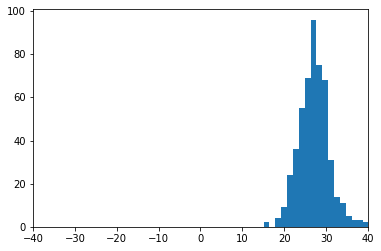

In [406]:
ppd = 100*(np.nanmedian(Rrs[ii,:,:], axis=0)- Rrs_aqua[:,ii])/Rrs_aqua[:,ii]
plt.hist(ppd, 100);
plt.xlim([-40,40])

In [405]:
ppd.mean()

23.22378671618328

In [407]:
λ

array([412, 443, 469, 488, 531, 547, 555, 645, 667, 678], dtype=int32)

In [9]:
xr.open_dataset(filename, group='sensor_band_parameters').F0.values

array([1729.12    , 1876.22    , 2058.78    , 1949.33    , 1857.47    ,
       1865.39    , 1838.6901  , 1578.1101  , 1522.55    , 1480.52    ,
       1280.65    ,  971.74005 ,  958.24    ,  454.66998 ,  239.76999 ,
         98.850006], dtype=float32)

In [418]:
Rrs.shape

(10, 121, 523)

In [419]:
x = np.nanmean(Rrs, axis=1)

In [420]:
x.shape

(10, 523)

In [423]:
x

array([[1.50407586e-04, 1.80414116e-04, 2.18843126e-04, ...,
        6.95111040e-05, 1.14430604e-04, 1.14661878e-04],
       [1.50407586e-04, 1.80414116e-04, 2.18843126e-04, ...,
        6.95111040e-05, 1.14430604e-04, 1.14661878e-04],
       [1.50407586e-04, 1.80414116e-04, 2.18843126e-04, ...,
        6.95111040e-05, 1.14430604e-04, 1.14661878e-04],
       ...,
       [1.50407586e-04, 1.80414116e-04, 2.18843126e-04, ...,
        6.95111040e-05, 1.14430604e-04, 1.14661878e-04],
       [1.50407586e-04, 1.80414116e-04, 2.18843126e-04, ...,
        6.95111040e-05, 1.14430604e-04, 1.14661878e-04],
       [1.50407586e-04, 1.80414116e-04, 2.18843126e-04, ...,
        6.95111040e-05, 1.14430604e-04, 1.14661878e-04]])

In [2]:
Rrs.shape

NameError: name 'Rrs' is not defined

In [61]:
λ = bands[0:16]

In [62]:
rhot_names = []
aot_names = []


for w in λ:
    rhot_names.append('rhot_%d' % w)
    aot_names.append('aot_%d' % w)



In [63]:
rhot = np.empty((len(λ), 11*11, len(sorted_fnames))) + np.nan
aot = np.empty((len(λ), 11*11, len(sorted_fnames))) + np.nan


In [65]:
for i, filename in enumerate(tqdm(sorted_fnames)):
    try:
        nc_fid = Dataset(filename, 'r')
        f_temp = nc_fid['geophysical_data']['l2_flags'][:].data.ravel()

        if len(f_temp) <=121:
            for l in range(len(λ)):
#                 rhot_temp = nc_fid['geophysical_data'][rhot_names[l]][:].data.ravel()
                aot_temp = nc_fid['geophysical_data'][aot_names[l]][:].data.ravel()

#                 rhot[l,:,i] =  np.pad(rhot_temp, (0,np.abs(121 - len(f_temp))))
                aot[l,:,i] =  np.pad(aot_temp, (0,np.abs(121 - len(f_temp))))
                
    #             Rrs_mask[l,:,i] = (Rrs[l,:,i] > 0) & (Rrs[l,:,i] < 1)
    except OSError and IndexError and  FileNotFoundError:
        print('Can not read this file ' + filename)


 35%|███▍      | 181/523 [00:19<00:32, 10.52it/s]

Can not read this file NA


 36%|███▌      | 187/523 [00:19<00:25, 13.37it/s]

Can not read this file NA
Can not read this file NA
Can not read this file NA


 37%|███▋      | 193/523 [00:20<00:20, 15.83it/s]

Can not read this file NA
Can not read this file NA


 38%|███▊      | 199/523 [00:20<00:22, 14.70it/s]

Can not read this file NA
Can not read this file NA
Can not read this file NA


 39%|███▉      | 206/523 [00:21<00:25, 12.25it/s]

Can not read this file NA


 42%|████▏     | 219/523 [00:22<00:25, 11.96it/s]

Can not read this file NA
Can not read this file NA
Can not read this file NA


 88%|████████▊ | 461/523 [00:48<00:05, 11.43it/s]

Can not read this file NA


100%|██████████| 523/523 [00:54<00:00,  9.56it/s]


In [28]:
rhot.shape

(16, 121, 523)

In [29]:
np.save('rhot_all', rhot)

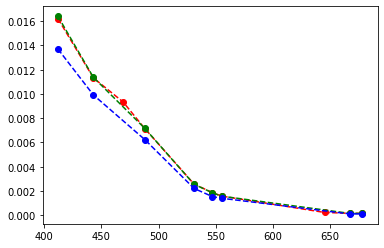

In [41]:
ii = 0
plt.plot(λ[0:10], np.nanmedian(Rrs[0:10,:,ii], axis=1), '--or');
plt.plot(mw, Rrs_aqua[ii,:],  '--og')
plt.plot(mw, Rrs_mob[ii,:],  '--ob')

In [39]:
Rrs_aqua = np.load('Rrs_aqua.npy')
Rrs_mob = np.load('Rrs_mob.npy')

In [43]:
zz = np.load('aot.npy')

In [44]:
zz.shape

(10, 121, 523)

In [47]:
np.save('aot_all', aot)

NameError: name 'wl' is not defined

In [66]:
aot.shape

(16, 121, 523)